# Модель линейной регрессии

**Машинное обучение (Machine Learning, ML)** — это область искусственного интеллекта, которая занимается разработкой и применением алгоритмов и моделей, позволяющих автоматически извлекать знания из данных, выявлять закономерности и делать прогнозы или принимать решения на основе этих данных без явного программирования каждой отдельной задачи.

В процессе обучения алгоритмы используют статистические методы и методы оптимизации для анализа и обработки данных, что позволяет им адаптироваться к новым данным и улучшать свою производительность с течением времени.

***Виды машинного обучения***

1. Обучение с учителем (Supervised learning). В этом подходе модель обучается на разменных данных, где для каждого входного примера известа соответствующая метка (например, диагноз на основе симптомов). 

    Задачи:
    * Классификация: определение класса для данных (например, классификация тканей как доброкачественных или злокачественных).
    * Регрессия: предсказание непрерывного значения (например, предсказание уровня глюкозы в крови).

2. Обучение без учителя (Unsupervised learning).Здесь модель работает с неразмеченными данными и выявляет скрытые структуры или паттерны. 

    Задачи: 
    * Кластеризация: группировка данных по схожести (например, идентификация подгрупп пациентов с похожими симптомами).
    * Снижение размерности: упрощение данных, сохраняя важную информацию (например, использование методов для визуализации больших наборов данных).

3. Обучение с частичным привлечением учителя (Semi-supervised learning). Соединяет элементы первого и второго подходов, используя как размеченные, так и неразмеченные данные. Это полезно, когда размеченных данных недостаточно.

4. Обучение с подкреплением (Reinforcement Learning, RL). Модель обучается на основе взаимодействия с окружающей средой получает вознаграждения или штрафы за свои действия. Эта техника может быть использована, например, в робототехнике для выполнения хирургических операций.

**Задача регрессии** — это подход машинного обучения, который используется для предсказания непрерывных значений, таких как уровни биомаркеров, дозы лекарств или прогнозые показатели здоровья на основе определенных входных данных. Регрессия помогает установить количественные отношения между зависимой переменной (например, уровень сахара крови) и одной или несколькими независимыми переменными (например, возраст, уровень физической активности, диета и др.).

***Примеры задач регрессии в медицине:***

1. Прогнозирование уровня глюкозы:

Модель может быть обучена для предсказания уровня глюкозы в крови пациента на основе параметров, таких как предыдущие уровни глюкозы, диетические привычки, уровень физической активности и использование инсулина. Это может помочь диабетикам лучше управлять своим состоянием.

2. Оценка риска возникновения заболеваний:

Регрессионные модели могут использоваться для оценки вероятности развития заболеваний (например,ечно-сосудистых) на основе факторов риска, таких как возраст, пол, курение, уровень холестерина и артериальное давление.

3. Прогнозирование результатов лечения:

Здесь задачи могут включать предсказание времени до рецидива заболевания или общего выживания пациента после определенного лечения на основе физических характеристик, лабораторных анализов и других клинических показателей.

4. Изменение веса:

Модели могут предсказывать изменение веса у пациента на основе таких факторов, как диета, физическая активность, генетические факторы и сопутствующие заболевания.

5. Мониторинг и прогнозирование состояния пациентов:

В интенсивной терапии модели могут использоваться для прогнозирования показателей жизнедеятельности (например, артериального давления, частоты сердечных сокращений) на основе данных о текущем состоянии пациента чтобы заранее выявить потенциальные ухудшения.

Рассмотрим наиболее простой вариант регрессионный модели - ***модель линейной регрессии***. 

Модель линейной регрессии: $$y =\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon, $$ где $x_1, x_2, ..., x_n$ — независимые переменные, $y$ — зависимая переменная (целевая переменная, переменная отклика), $\beta_1, \beta_2, ..., \beta_n$ — коэффициенты регрессии, $\epsilon$ — ошибка модели, представляющая собой разницу между предсказанным значением и реальным значением.

Рассмотрим задачу предсказания стоимости медицинской страховки. Имеется таблица данных (файл `insurance.csv`), содержащий следующие столбцы:
* age - возраст,
* sex - пол,
* bmi - индекс массы тела (ИМТ),
* children - колчисетво детей,
* smoker - отношение к курению: курит (yes) или не курит (no), 
* region - регион проживания,
* charges - стоимость медицинской страховки.

Загрузим данные из файла в таблицу датафрейм.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Для построения моделей машинного обучения будем пользоваться библиотекой `Scikit-learn` (или `sklearn`) - одной из самых популярных библиотек для машинного обучения в `Python` (см. https://scikit-learn.org/stable/index.html). 

## Подготовка данных для обучения модели

In [4]:
import sklearn

Независимые признаки (возраст, пол, ИМТ, количество детей, отношение к курению и регион проживания) запишем в переменную `X`, а целевой признак (стоимость медицинской страховки) - в переменную `y`.

In [5]:
X = df.drop(columns=['charges'])
y = df['charges']

In [6]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

При использовании моделей обучения с учителем данные делят на группы, в зависимости от целей их импользования. Разделим наш набор данных на 2 группы: обучающая выборка (`train`) и тестовая выборка (`test`). Обучающую выборку используют для вычисления параметров модели (в этом случае говорят, что модель "обучается"), а тестовую выборку используют для проверки качества модели. Разделение данных на обучающую и тестовую выборки является критически важным аспектом машинного обучения. Это позволяет не только обучить модель на известных данных, но и проверить её способность обобщать информацию на новых данных, что является основным критерием успешности модели. Правильное разделение данных помогает избежать переобучения (overfitting) и позволяет получить более надежные и устойчивые результаты.

**ВАЖНОЕ ПРАВИЛО**: Разделяйте данные на обучающую и тестовую выборки до любой обработки, чтобы избежать использования информации из тестовой выборки при обучении. В противно случае может произойти учетка данных (data leakage), возникающая, когда информация из тестовой выборки используется при обучении модели. Это может привести к переобучению (overfitting) и, как следствие, к чрезмерно оптимистичной оцен качества модели, которая не будет сохраняться на новых, невидимых данных.

Для разделения данных на обучающую и тестовую выборку в библиотеке `sklearn` в модуле `model_selection` есть функция `train_test_split` параметрами (подробнее смотри в официальной документации функции https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):
* данные для разделения (могут иметь формат массивов numpy, списков, разреженных матриц или датафреймов (таблиц) pandas);
* test_size - размер тестовой выборки:
    * может быть задан числом от 0 до 1, тогда будет интепретироваться как доля тестовой выборки в общем объёме; 
    * может быть задан целым числом, тогда будет интерпретироваться как число элементов выборки; 
    * если не указано, то будет использовано значение по умолчанию (default), равное 0.25;
* random_state - величина, которая управляет перемешиванием, применяемым к данным перед разделением.


***Для чего нужна величина `random_state`?*** Процесс разделения данных происходит в 2 этапа: на первом этапе данные случайным образом перемещиваются, а втором этапе первые `k` строк записываются в тестовую выборку, а остальные - в обучающую. Элемент случайности при перемещивании данных призван обеспечить ***репрезентативность*** выборки. Однако, если запусть код несколько раз, это приведет к тому, что новое разделение данных будет отличаться по составу о предыдущего. В таких условиях сложно сохранить ***восроизводимость результатов модели***. 

***Для чего нужна воспроизводимость результатов?*** При сравнении различных моделей или настроек гиперпараров важно, чтобы данные были разделены одинаково. Использование одинакового random_state позволяет гарантировать, что модели учатся на одних и тех же обучающих подвыборках и тестируются на одних и тех же тестовых подвыборках, что делает результаты сравнения справедливыми. Например, вы использовали модель линейной регресси и получили некоторые оценки качества модели, затем попробовали другую модель, например, регрессию на основе градиентного бустинга и получили другие (лучшие) оценки качества модели. Если величина random_state не была при этом зафиксирована, то возникает сомнения: лучшие оценки качетва модели обусловлены выбором модели или просто было спровоцированы разным составом подвыборок? Чтобы этого не произошло, на этапе построения моделей все параметры случайности фиксируют некоторой константой, которая обеспечивает воспроизводимость результатов.

In [8]:
from sklearn.model_selection import train_test_split # импорт функции
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# разделение на подвыборки в соотношении 20% - тестовая выборка, 80% - обучаюшая выборка, 
# величина random_state=42 гарантирует вопсроизводимость результатов

Для обучения модели линейной регрессии будем использовать класс `LinearRegression` в модуле `sklearn.linear_model` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

## Построение модели

Для начала будем строить модель линейной регрессии только для количественных признаков (). 

In [9]:
X_numeric_train = X_train.drop(columns=['sex', 'smoker', 'region'])
X_numeric_test = X_test.drop(columns=['sex', 'smoker', 'region'])
X_numeric_train

,age,bmi,children
560,46,19.950,2
1285,47,24.320,0
1142,52,24.860,0
969,39,34.320,5
486,54,21.470,3
...,...,...,...
1095,18,31.350,4
1130,39,23.870,5
1294,58,25.175,0
860,37,47.600,2


In [10]:
from sklearn.linear_model import LinearRegression # импорт класса
model = LinearRegression() # создание объекта класса
model.fit(X_numeric_train, y_train) # обучение модели линейной регрессии 

LinearRegression()

При помощи аттрибутов класса можно вывести коэффициенты регрессии:
* $\beta_0$ при помощи аттрибута intercept_,
* $\beta_1, ..., \beta_n$ при помощи аттрибута coef_.

In [11]:
model.intercept_

-6118.046178106708

In [12]:
model.coef_

array([220.75776541, 332.20247584, 563.01943242])

Таким образом модель обучилась и получено следующее уравнение линейной регрессии: $$ y = -6118.05 + 220.76 x_1 + 332.20 x_2 + 563.02 x_3, $$ где $x_1$ - возраст, $x_2$ - индекс массы тела, $x_3$ - количество детей, $y$ - стоимость медицинской страховки.

Одним из существенных преимуществ простых моделей, таких как модель линеной регрессии, является их интерпретируемость. Коэффициенты регрессии подразумевают следующую интерпретацию: каждый коэффициент ($\beta_i$) показывает, как изменится целевая переменная ($y$) при увеличении соответствующего признака ($x_i$) на единицу, при условии, что остальные признаки остаются фиксированными (это называется "влиянием на уровне других переменных"). В нашем случае, это означает, что при увеличении возраста на 1 год стоимость медицинской страховки в среднем вырастает на 220.76 у.е., при увеличении ИМТ на 1 - страховка вырастет на 332.20 у.е., а с рождением 1 ребенка - на 563.02 у.е.

**Важные замечания**
1. Взаимосвязи между признаками. Линейная регрессия предполагает, что независимые переменные не коррелируют друг с другом (отсутствие мультиколлинеарности). Если переменные коррелируют, интерпретация коэффициентов может быть затруднена.

2. Регрессия не показывает причинно-следственные связи. Наличие линейной зависимости не подразумевает, что одно вызывает другое. Важно проводить дальнейшие исследования, чтобы подтвердить причинность.

3. Ограничения модели. Линейная регрессия предполагает, что связь между признаками и целевой переменной является линейной. Если это не так, результаты могут быть искаженными и не соответствовать реальности.

## Проверка мультиколлинеарности

Для проверки мультиколлинеарности можно воспользоваться уже известной (см. практическое занятие 5 модуля 2 курса) библиотекой `phik`. Значения выше 0.8 могут указывать на мультиколлинеарность, хотя это только эмпирическое правило, а не руководство к действию.

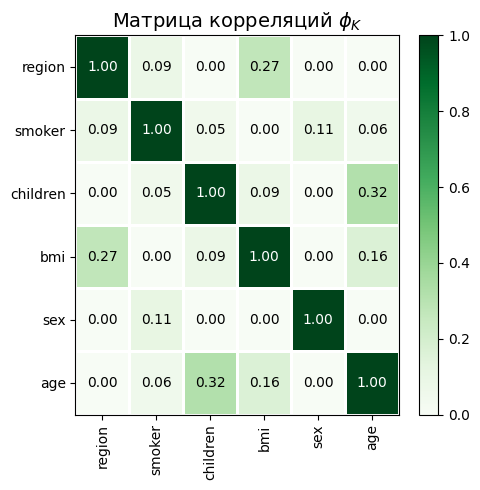

In [13]:
import phik
phik_overview = X.phik_matrix(interval_cols = ['age', 'bmi', 'children'], njobs=1)
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(5, 5))
plt.tight_layout()

Мультиколлинеарности в данных не выявлено.
Можно приступить к предсказанию модели на тестовых данных. Для этого используется метод `predict`.

## Построение прогноза

In [14]:
prediction = model.predict(X_numeric_test)
prediction

array([13305.28945949, 11801.95170145, 16941.71437111, 14278.42206855,
        8680.25439362, 16202.22349193,  5555.8901083 , 20602.58565492,
        5806.95206068, 15919.03165614, 10299.48549201, 14221.13480456,
       10676.8197114 , 19794.64417995, 20721.14505796, 18319.57207031,
       20003.52486079, 16989.16491869, 13918.10991054, 12305.80129754,
       10155.63429188, 15330.37731182,  8175.30663033, 11961.94421188,
       15950.43401031, 16659.25006455, 18787.72664854, 11630.42705085,
       14220.19351839,  7868.1762212 , 14697.87471015, 17037.49024392,
       10101.76722818,  8821.1844745 , 10150.74943027, 17039.37281627,
        7851.03169019, 13870.41119463, 13940.42279767, 14085.77995875,
       10392.4393359 ,  9716.19171103, 18700.25675242, 15364.53701599,
       14169.23745665, 16605.24949913, 10815.87502296,  9162.47641738,
       17012.91908784, 14604.73646207, 19848.64291578,  8175.39974722,
       17035.11042013,  6534.38328069, 17682.11992809, 16712.90245652,
      

Настала пора проверить, насколько предсказанные значения совпадают с реальными? Для оценки соответствия используют **метрики качества** модели.

## Метрики качества

**1. Средний квадрат отклонений (Mean Squared Error, MSE)** $$ \text{MSE}(y, \hat{y}) = \frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}, $$ где $y_i$ - истинные значения, $\hat{y}_i$ - предсказанные моделью значения, $N$ - число наблюдений в тестовой выборке.

Для вычисления среднего квадарата отклонений в бибилиотеке `sklearn` в модуле `metrics` есть функция `mean_squared_error`.

In [15]:
from sklearn.metrics import mean_squared_error # импорт функции
mse = mean_squared_error(y_test, prediction) # вычислении MSE
mse

131201335.64669806

Получилось, что средний квадрат отклонений равен 131 201 335.65 квадратных у.е. Единицы измерения этой метрики качества равны квадратам единиц измерения исходных значений целевой переменной. Это не всегда удобно, поэтому наряду со средним квадратом отклонений используют корень среднего квадрата отклонений, имеющий те же единицы измерения, что и целевая переменная.

**2. Корень среднего квадрата отклонений (Root Mean Square Error, RMSE)** $$
\text{RMSE}(y, \hat{y}) = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}
$$

In [16]:
import numpy as np
rmse = np.sqrt(mse)
rmse

11454.315153980095

Получилось 11 477.42 у.е. Можно избежать при вычислении отклонений возведение в кдвадрат. Тогда избавиться от знака отклонений (плюс или минус) поможет модуль числа.

**3. Средняя абсолютная ошибка (Mean Absolute Error, MAE)** $$ \text{MAE}(y, \hat{y}) = \frac{ \sum_{i=0}^{N - 1} |y_i - \hat{y}_i| }{N} $$

In [17]:
from sklearn.metrics import mean_absolute_error # импорт функции
mae = mean_absolute_error(y_test, prediction) # вычислении MAE
mae

9181.311632897381

Получилось 9 181.31 у.е.

Сравним метрики MAE и MSE.
Метрика| Преимущества | Недостатки |
|:--------:|:--------:|:--------:|
| MAE |Проще интерпретировать, поскольку соответствует среднему абсолютному отклонению. Меньше подвержен влиянию выбросов, что делает его более устойчивым при наличии аномалий в данных. |Не подчеркивает более крупные ошибки. Если в задаче важны большие ошибки (например, в финансовых приложениях), это может быть недостатком. | 
| MSE | Более чувствителен к большим ошибкам; хорошо подходит для ситуаций, когда важна минимизация значительных отклонений. | Более подвержен влиянию выбросов, что может исказить оценку качества модели. Значение MSE трудно интерпретировать, так как находится в квадратичных единицах (например, если целевая переменная в долларах, MSE будет в долларах в квадрате). | 

Выбор между MAE и MSE зависит от конкретной задачи и того, что важнее: избегать небольших ошибок или минимизировать влияние больших ошибок. Если выбросы значимы и важно их учитывать, возможно, MSE будет предпочтительнее. Однако, если требуется более устойчивое измерение качества модели с простыми интерпретациями, MAE будет более подходящим выбором. В некоторых случаях полезно учитывать обе метрики для более полного понимания производительности модели.

Визуальные графики MAE и MSE помогут лучше понять, как эти метрики реагируют на ошибки. MAE более устойчив к выбросам, в то время как MSE более чувствителен к большим ошибкам из-за квадратного характера. 

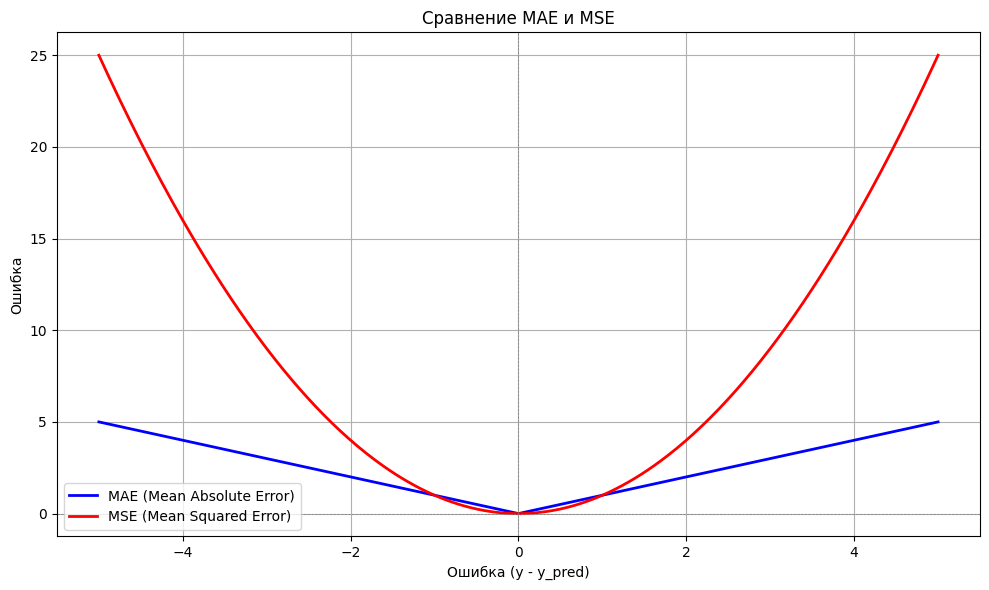

In [18]:
# Определяем диапазон ошибок
errors = np.linspace(-5, 5, 400)

# Вычисляем значения для MAE и MSE
mae = np.abs(errors)
mse = errors**2

# Создаем график
plt.figure(figsize=(10, 6))

# График MAE
plt.plot(errors, mae, color='blue', label='MAE (Mean Absolute Error)', linewidth=2)

# График MSE
plt.plot(errors, mse, color='red', label='MSE (Mean Squared Error)', linewidth=2)

# Добавим заголовок и легенду
plt.title('Сравнение MAE и MSE')
plt.xlabel('Ошибка (y - y_pred)')
plt.ylabel('Ошибка')
plt.axhline(0, color='gray', lw=0.5, ls='--')  # Горизонтальная линия на уровне 0
plt.axvline(0, color='gray', lw=0.5, ls='--')  # Вертикальная линия на уровне 0
plt.grid()  # Сетка для лучшей читаемости
plt.legend()  # Легенда для обозначения графиков

# Покажем график
plt.tight_layout()
plt.show()

Метрикой, свободной от единиц измерения является коэффициент детерминации.

**4. Коэффициент детерминации (R-squared)**  

$$R^2 = 1 - \frac{MSE}{D}, $$ где

$D = \sum_{i=1}^{n} (y_i - \bar{y})^2$, $\bar{y} = \frac{1}{N}\sum_{i=1}^{n} y_i$

In [19]:
from sklearn.metrics import r2_score # импорт функции
r2 = r2_score(y_test, prediction) # вычисление коэффициента детерминации
r2

0.15489592484270753

Получилось 0.15 или 15%. То есть, 15% изменчивости стоимости страховки объясняется изменчивостью выбранных в модели переменных (возраст, ИМТ и число детей). 

## Масштабирование количественных признаков

Качество модели пока оставляет желать лучшего. На качество модели может влиять разница в шкалах признаков. Признаки могут иметь разные диапазоны значений (например, один признак может варироваться от 0 до 1, в то время как другой — от 1 до 1000). В случае линейной регрессии большая величина одного признака может доминировать над другими при обновлении весов во время оптимизации. Масштабирование помогает избежать такой ситуации. Масштабирование признаков является важным шагом в предварительной обработке данных, который может существенно повлиять на эффективность и точность моделей машинного обучения.

Среди популярных методов масштабирования находятся:

1. Стандартизация (Z-оценка). Признаки преобразуются так, чтобы иметь нулевое среднее и единичное стандартное отклонение. $$z = \frac{x - \mu}{\sigma},$$ где $\mu $ — среднее значение признака, а $\sigma$ — стандартное отклонение.

2. Нормализация. Признаки масштабируются в диапазон от 0 до 1. $$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$

Для стандартизации есть класс `StandardScaler` в моделу `preprocessing` библиотеки `sklearn`.

In [20]:
from sklearn.preprocessing import StandardScaler # импорт класса
scaler = StandardScaler() # создание объекта класса
X_numeric_train_scaled = scaler.fit_transform(X_numeric_train) # обучение скейлера и применение к обучающей выборке
X_numeric_test_scaled = scaler.transform(X_numeric_test) # применение скейлера к тестовой выборке

**ВАЖНО!** Чтобы избежать утечки данных обучать скейлер (то есть вычислять среднее и дисперсию) нужно только на обучающей выборке - функцию `fit_transform` следует применять только к обучающей выборке. А к тестовой выборке только применять готовый скейлер - функция `transform`.

Постморим, как изменились значения признака после масштабирования методом `StandardScaler` при помощи построения гистограмм.

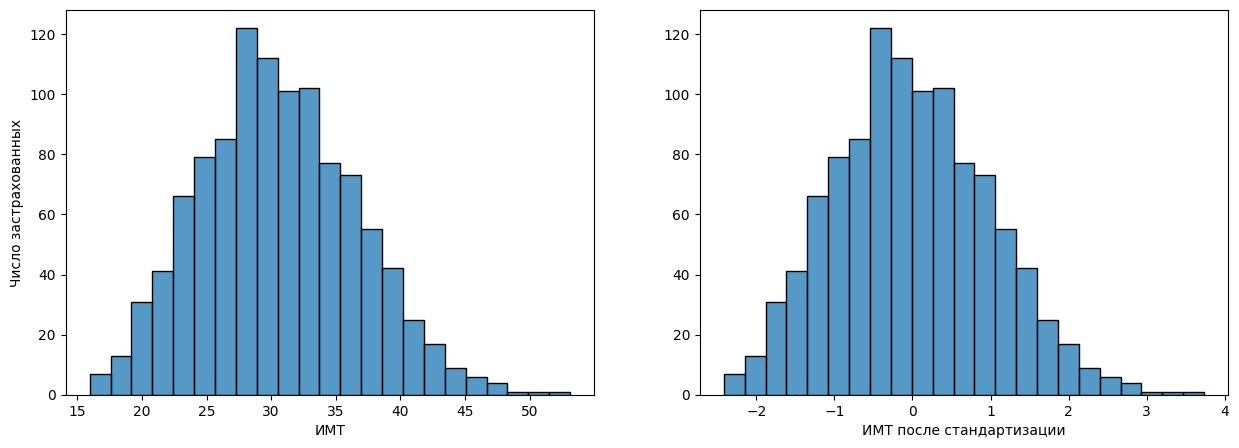

In [21]:
import seaborn as sns
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(x = X_numeric_train['bmi'], ax = ax_1)
sns.histplot(x = X_numeric_train_scaled[:,1], ax = ax_2)
    
ax_1.set(xlabel = 'ИМТ', ylabel='Число застрахованных')
ax_2.set(xlabel = 'ИМТ после стандартизации', ylabel='')

plt.show()

Видно, что распределение признака не изменилос, а изменилась только шкала значений по оси абсцисс.

Для нормализации есть класс `MinMaxScaler` в моделу `preprocessing` библиотеки `sklearn`.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
X_numeric_train_scaled2 = scaler2.fit_transform(X_numeric_train)
X_numeric_test_scaled2 = scaler2.transform(X_numeric_test)


Посмотрим, как повлиял этот скейлер на распределение признака.

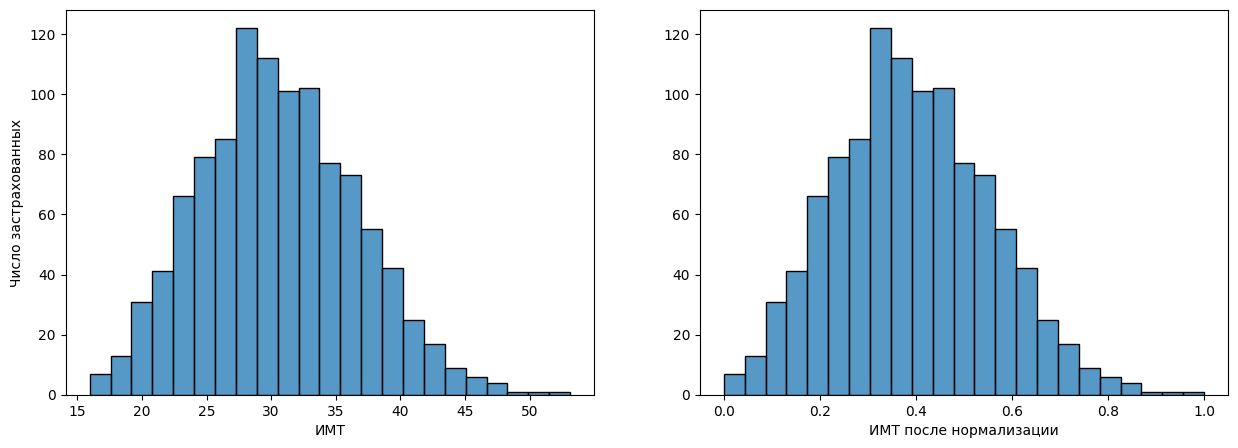

In [23]:
import seaborn as sns
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(x = X_numeric_train['bmi'], ax = ax_1)
sns.histplot(x = X_numeric_train_scaled2[:,1], ax = ax_2)
    
ax_1.set(xlabel = 'ИМТ', ylabel='Число застрахованных')
ax_2.set(xlabel = 'ИМТ после нормализации', ylabel='')

plt.show()

Снова распределенеи признака не поменялось, а поменялась шкала по оси абсции - теперь она в диапазоне от 0 до 1.

Оформим результаты масштабирования в таблицу датафрейм.

In [24]:
numeric = ['age', 'bmi','children']
X_train_scaled = pd.DataFrame(X_numeric_train_scaled, columns=numeric)
X_test_scaled = pd.DataFrame(X_numeric_test_scaled, columns=numeric)

## Кодирование категориальных признаков

Не все признаки исходной таблицы были использованы при построении модели. Остались категориальные признаки (пол, отношение к курению и регион проживания), которые можно добавить в модель. Но модель регрессии - это линейное уравнение, аргументами которого могут быть только числа. Выход есть - ***кодирование категорильаных признаков***. Одним из наиболее популярных в машинном обучении подходов кодирования призанков является **One Hot Encoding**.

***Принцип работы One Hot Encoding***

1. Идентификация категорий. Для каждого категориального признака необходимо определить все возможные категории, которые он может принимать. Например, у нас есть признак "Регион проживания", возможные значения которого 'southwest', 'southeast', 'northwest', 'northeast'.

2. Создание бинарных признаков. Для каждой уникальной категории создаётся новый бинарный (0/1) признак. Каждый новый признак принимает значение 1, если наблюдение относится к этой категории, и 0 в противном случае.

Например, категориальный признак "регион проживания" имел следующие значеня:

index| region | 
|:--------:|:--------:|
| 560 | northwest | 
| 1285 | northeast | 
| 1142 | southeast | 
| 860 | southwest | 

После кодирования признак представлен четырьмя столбцами: `region_northeast`, `region_northwest`, `region_southeast`,`region_southwest`.

index| region_northeast | region_northwest | region_southeast | region_southwest | 
|:--------:|:--------:|:--------:|:--------:|:--------:|
| 560 | 0 | 1 | 0 | 0 |
| 1285 | 1 | 0 | 0 | 0 |
| 1142 | 0 | 0 | 1 | 0 |
| 860 | 0 | 0 | 0 | 1 |

Выберем категориальные признаки.

In [25]:
X_categoric_train = X_train.drop(columns=['age', 'bmi','children'])
X_categoric_test = X_test.drop(columns=['age', 'bmi','children'])
X_categoric_train

,sex,smoker,region
560,female,no,northwest
1285,female,no,northeast
1142,female,no,southeast
969,female,no,southeast
486,female,no,northwest
...,...,...,...
1095,female,no,northeast
1130,female,no,southeast
1294,male,no,northeast
860,female,yes,southwest


Метод One Hot Encoding есть в библиотеке `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [26]:
from sklearn.preprocessing import OneHotEncoder # импорт класса
encoder = OneHotEncoder(sparse=False) # создание объекта класса
X_categoric_train_ohe = encoder.fit_transform(X_categoric_train) # обучение объекта и кодирование признаков
X_categoric_test_ohe = encoder.transform(X_categoric_test) # кодирование признаков

**Обратите внимание!!!** При кодировании тестовой подбвыборки использовалась функция `transform`, а не `fit_transform`. Это важно для избежания утечки данных.

Это накладывает определенные особенности на кодирование тестововй выборки. Может случится так, что какие-то категории признака попали только в тестовую выборки, и  не попали в обучающую. Это значит, что не будет создано столбцов с этоми категориями. Как же тогда закодировать их? Для этого существую параметр функции `handle_unknown`, который может принимать следующие значения:

* `error` - выдать ошибку, если во время преобразования присутствует неизвестная категория (это значение по умолчанию);
* `ignore` - если во время преобразования встречается неизвестная категория, то результирующие столбцы для этого признака будут заполнены нулями;
* `infrequent_if_exist` - если во время преобразования встречается неизвестная категория, полученные столбцы для этого признака будут сопоставлены с самой нечастой категорией, если она существует;
* `warn` - если во время преобразования встречается неизвестная категория, выдается предупреждение, а затем кодирование продолжается, как описано для `infrequent_if_exist`.


При помощи метода `get_feature_names_out()` можно вывести новые названия столбцов после кодирования

In [27]:
encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

После кодирования признаков на выходе мы получаем не датафрейм, а либо массив numpy (если при создании объекта указано параметр `sparse=False`), либо разреженную матрицу (`sparse=True`). 

**Разреженные матрицы (sparse)** — это структура данных, которая эффективно хранит матрицы, в которых большинство элементов равны нулю.Разреженные матрицы занимают меньше памяти, особенно для больших наборов данных с большим количеством нулей. Это может быть критически важно при работе с ограниченными ресурсами или при обработке очень больших данных. Однако для отображения данных в виде таблицы на экране они не подходят. Поэтому при создании объекта был выбран параметр `sparse=False`.

Отобразить результаты кодирования будет удобнее, если оформить их в виде таблицы датафрейм.

In [28]:
X_train_ohe = pd.DataFrame(X_categoric_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_categoric_test_ohe, columns=encoder_col_names)
X_train_ohe

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1065,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Объединим все признаки (количественные и категориальные) после масштабирования и кодирвоания в один датафрейм.

In [29]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_train

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.472227,-1.756525,0.734336
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.543313,-1.033082,-0.911192
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.898745,-0.943687,-0.911192
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.025379,0.622393,3.202629
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.040918,-1.504893,1.557100
...,...,...,...,...,...,...,...,...,...,...,...
1065,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.518194,0.130717,2.379865
1066,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.025379,-1.107579,3.202629
1067,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.325264,-0.891539,-0.911192
1068,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.167551,2.820864,0.734336


Проверим все признаки на мультиколлинеарность.

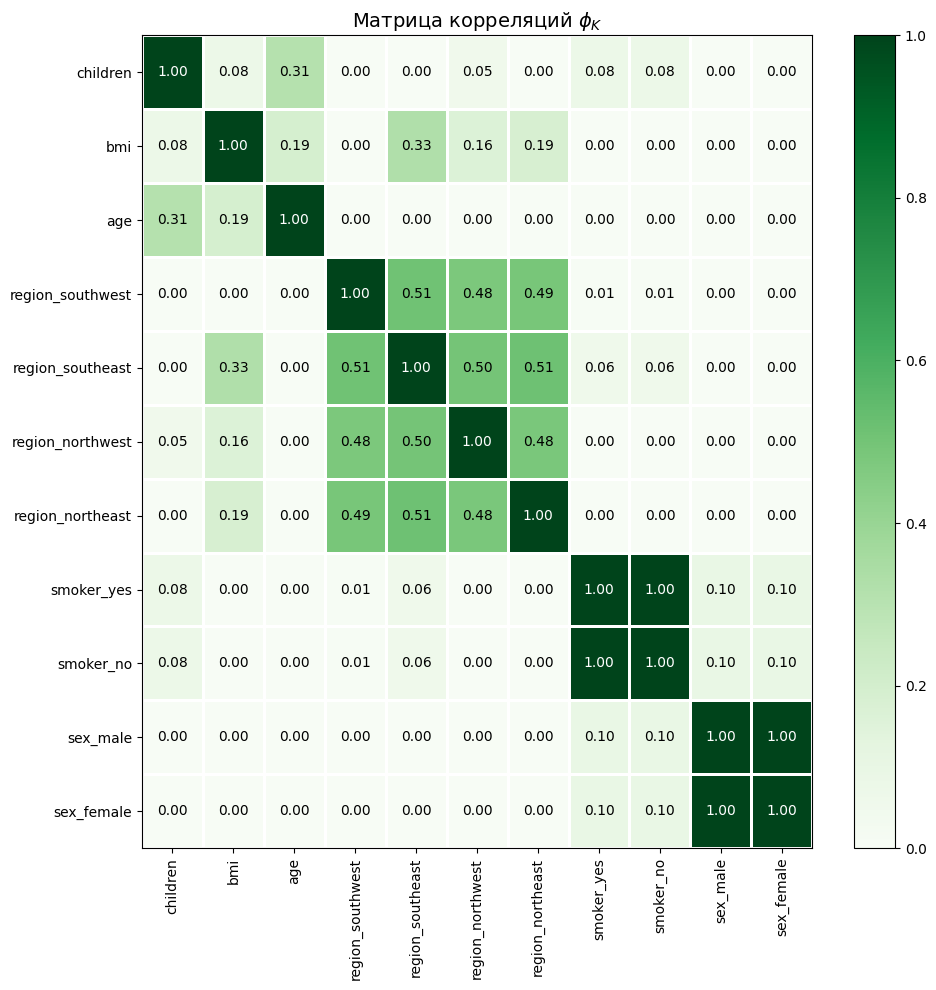

In [30]:
phik_overview = X_train.phik_matrix(interval_cols = ['age', 'bmi', 'children'], njobs=1)
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 10))
plt.tight_layout()

Получилось, что разные категории качественных признаков сильно связаны между собой, а бинарные признаки (пол и отношение к курению) вообще имеют абсолютную связь. Это и не удивительно! Ведь при кодировании методом One Hot Encoder мы получаем столбцы с избыточной информацией. Действительно, ведь если в столце `smoker_yes` стоит `1`, то этого уже означает, что человек курить и в столбце `smoker_no` вынужден будет стоять `0`. Таким образом, один из столбцов `smoker_yes` или `smoker_no` лишний и не несет новой информации, но создает мультиколлинеарность. При кодировании признака `region` также 4-х столбцов слишком много: по трем столбца можно восстановить всю информацию.

Для удаления отлельных столобцов, представляющих избыточную инфорацию у функции `OneHotEncoder()` есть параметр `drop`, который может принимать следующие значения:

1. `None` (по умолчанию).Все $k$ категорий будут закодированы, и в результате вы получите $k$ признаков.
2. `'first'`. Первая категория будет исключена из кодирования. Это означает, что при создании бинарных признаков будет использоваться $k-1$ категория. Например, если у вас есть категории "A", "B", "C", то будут созданы признаки для "B" и "C", а признак "A" будет подразумеваться, когда оба признака "B" и "C" равны 0.
3. `'if_binary'`. Если признак является бинарным (например, категории "0" и "1"), то одна из категорий будет исключена. Для остальных признаков остаются все категории. Это значительно упрощает ситуацию с бинарными признаками и уменьшает количество признаков.
4. `array` (в новых версиях). Позволяет указать конкретные категории для исключения, передавая массив с названиями признаков, которые нужно отбросить.

Избавимся от избыточной информации, возникающей при кодировании категориальных переменных, указав значение параметра `drop='first'` при создании объекта.

In [31]:
encoder = OneHotEncoder(sparse=False, drop='first') # создание объекта класса
X_categoric_train_ohe = encoder.fit_transform(X_categoric_train) # обучение объекта и кодирование признаков
X_categoric_test_ohe = encoder.transform(X_categoric_test) # кодирование признаков=

Можно убедиться, что категорий стало меньше:

In [32]:
encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

Соберем все признаки в один датафрейм:

In [33]:
X_train_ohe = pd.DataFrame(X_categoric_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_categoric_test_ohe, columns=encoder_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Снова проверим на мультиколлинеарность:

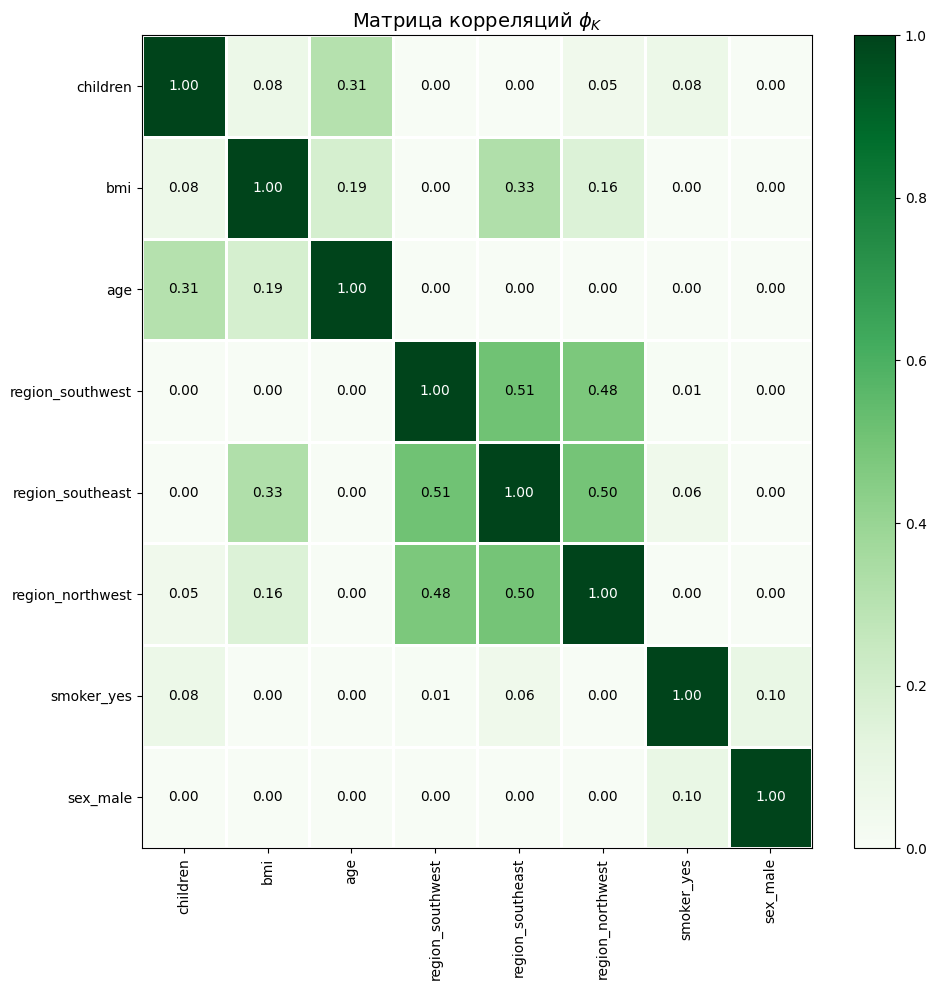

In [34]:
phik_overview = X_train.phik_matrix(interval_cols = ['age', 'bmi', 'children'], njobs=1)
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 10))
plt.tight_layout()

Построим модель по всем признакам:

In [35]:
model2 = LinearRegression()
model2.fit(X_train, y_train) 
prediction2 = model2.predict(X_test)

Вчислим метрики качества:

In [36]:
mse2 = mean_squared_error(y_test, prediction2)
print('Средний квадрат отклонений', mse2)
rmse2 = np.sqrt(mse2)
print('Корень среднего квадрата отклонений', rmse2)
mae2 = mean_absolute_error(y_test, prediction2)
print('Средняя абсолютная ошибка', mae2)
r22 = r2_score(y_test, prediction2)
print(f'Коэффициент детерминации {r22:0.0%}')

Средний квадрат отклонений 33596915.851361334
Корень среднего квадрата отклонений 5796.284659276263
Средняя абсолютная ошибка 4181.194473753645
Коэффициент детерминации 78%


Метрики качества стали значительно лучше! Коэффициент детерминации вырос с 15% до 78%.

## Анализ остатков

Остатками (ошибками) модели называется разность между истинными и предсказанными моделью значениями: $$ \epsilon_i = y_i - \hat{y}_i$$ 

Если модель подобрана правильно, то в остатках не должно остаться никаких закономерностей. Обычно при анализе проверяют:
1. Нормальность остатков
2. Независимость остатков
3. Однородность дисперсии остатков (гомоскедастичность)
4. Отсутствие тренда и выбросов

Визуально оценить нормальность остатков о отсутствие выбросов позволит их гистограмма и "ящик с усами":

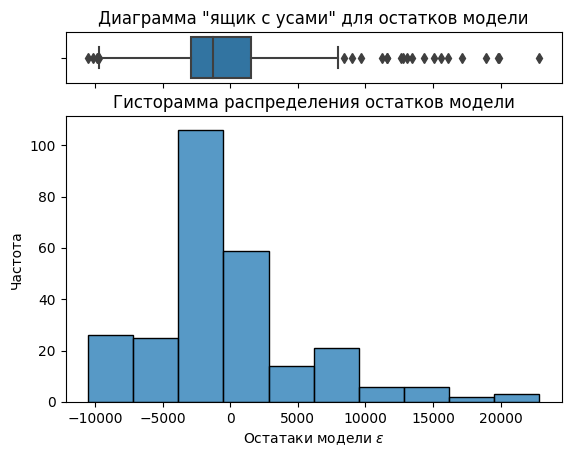

In [37]:
residuals = y_test - prediction2
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте
        
sns.boxplot(x = residuals, ax = ax_box)
sns.histplot(x = residuals, ax = ax_hist, bins = 10, kde = False)
    
ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'Остатаки модели $\epsilon$')
ax_hist.set(ylabel = 'Частота')
ax_box.set_title('Диаграмма "ящик с усами" для остатков модели')
ax_hist.set_title('Гисторамма распределения остатков модели')

plt.show()

In [38]:
from scipy.stats import skew
print(f'Коэффициент асимметрии распределения остатков {skew(residuals):0.2f}')

Коэффициент асимметрии распределения остатков 1.13


По гистограмме видно, что распределение остатков имеет небольшую правосторонню асимметрию. Несколько значений по диаграмме "ящик с усами" можно интепретировать как выбросы.

Для визуальной оценки независимости остатков и однородности дисперсии остатков строят точечный график остатков по предсказанным значениям. Если остатки случайны и независимы, точки будут распределены хаотично вокруг нуля, без явных паттернов.

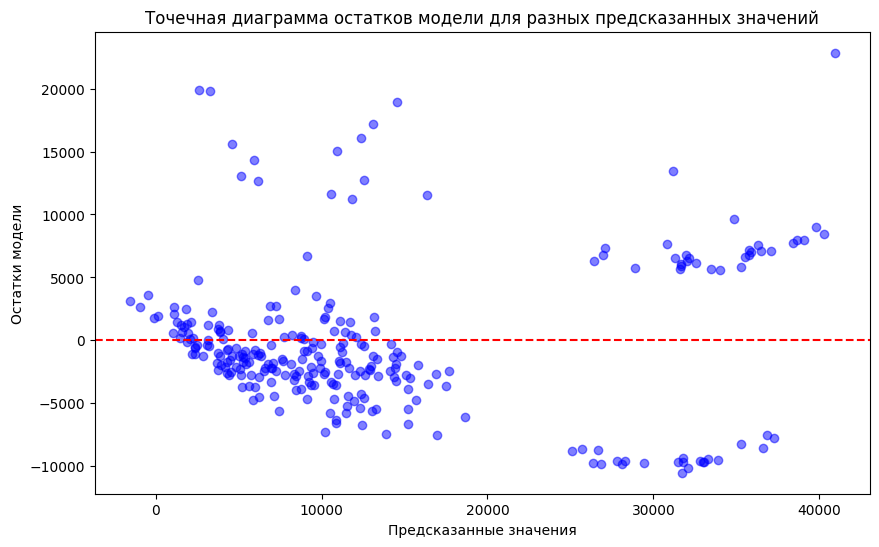

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(prediction2, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Точечная диаграмма остатков модели для разных предсказанных значений')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки модели')
plt.show()

По графику можно вделить 4 облака точек, что говорит об отсуствии однородности и независимости остатков.

In [40]:
print(f'Средняя стоимость страховки {y.mean():0.0f} у.е.')

Средняя стоимость страховки 13270 у.е.


Таким образом, самая простая регрессионная модель - модель линейной регрессии дала сомнительные результаты: средняя абсолютная ошибка прогнозных значений 4 181 у.е. при средней стоимости медицинской страховки 13 270 у.е.. Но есть и преимущество этой модели - интепретируемость её коэффициентов. Анализ остатков показывает, что в данных есть и более сложные закономерности, чем простая линейная функция. Поэтому нужно пробовать и другие варианты регрессионных моделей - способные учитывать и более сложные закономерности в данных. Но это уже тема других занятий...

***Зачетное задание по теме***

В файле `diabet_risk.csv` содержится набор данных, используемый для прогнозирования риска развития диабета у женщин племени Пима.

Признаки:

1. Pregnancies - количество беременностей.
2. BloodPressure - диастолическое артериальное давление (мм рт. ст.).
4. SkinThickness - толщина кожной складки на трицепсе (мм).
5. DiabetesPedigreeFunction - наследственность по заболеванию диабетом.
6. age_group - возрастная группа.
7. risk - риск развития диабета.

Постройте модель линейной регресси для прогноза риска развития диабета. Для этого выполните следующие шаги:

1. Загрузите данные.
2. Проведите предварительную подготовку данных: проверьте на наличие пропусков, дубликатов и т.д.
3. Изучите признаки на мультиколлинеарность и в случае наличия мультиколлинеарность исключите из каждой пары мультиколлинеарных признаков один прзнак из дальнейшего анализа.
3. Разделите данные на тестовую и обучающую подвыборки: в тестовую подвыборк включите 25% всего набора данных.
4. Проведите масштабирование количественных признаков.
5. Проведите кодирование категориального признака, не допускайте избыточной информации при кодировании. 
6. Обучите модель линейной регрессии на обучающей выборке.
7. Спронозируйте значения рисков развития диабета на тестовой выборке, вычислите метрики качества модели.
8. Проанализируйте остатки модели.
9. Сделайте общий вывод по заданию.


In [1]:
# в этой ячейке должен быть ваш код
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка данных
df = pd.read_csv('diabet_risk.csv')
df.head()

,Unnamed: 0,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,age_group,risk
0,0,6,72.0,35,0.627,Средний возраст,98.38
1,1,1,66.0,29,0.351,Молодые взрослые,60.18
2,2,8,64.0,32,0.672,Молодые взрослые,102.19
3,3,1,66.0,23,0.167,Молодые взрослые,58.13
4,4,0,40.0,35,2.288,Молодые взрослые,94.23


In [2]:
# Проверка на пропуски
print("Пропуски в данных:")
print(df.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:", df.duplicated().sum())

# Удаление дубликатов, если они есть
df = df.drop_duplicates()

# Проверка типов данных
print("\nТипы данных:")
print(df.dtypes)


Пропуски в данных:
Unnamed: 0                  0
Pregnancies                 0
BloodPressure               0
SkinThickness               0
DiabetesPedigreeFunction    0
age_group                   0
risk                        0
dtype: int64

Количество дубликатов: 0

Типы данных:
Unnamed: 0                    int64
Pregnancies                   int64
BloodPressure               float64
SkinThickness                 int64
DiabetesPedigreeFunction    float64
age_group                    object
risk                        float64
dtype: object


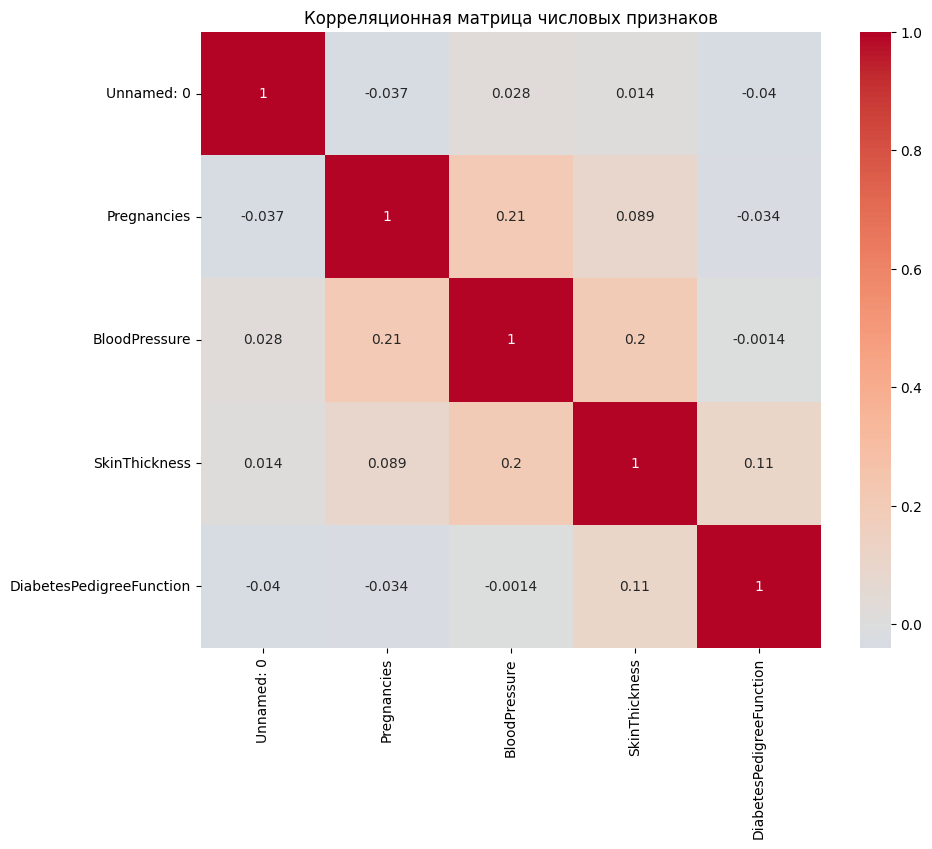

VIF факторы:
                    feature        VIF
0                Unnamed: 0   3.787936
1               Pregnancies   2.423616
2             BloodPressure  14.827065
3             SkinThickness  11.336892
4  DiabetesPedigreeFunction   2.968343

Удаляем признаки с высоким VIF: ['BloodPressure', 'SkinThickness']


In [3]:
# Выделим только числовые признаки для анализа
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('risk')  # исключаем целевую переменную

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

# Расчет VIF (Variance Inflation Factor) для мультиколлинеарности
X = df[numerical_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF факторы:")
print(vif_data)

# Удаляем признаки с высоким VIF (обычно >5 или >10)
features_to_drop = vif_data[vif_data['VIF'] > 5]['feature'].tolist()
if features_to_drop:
    print(f"\nУдаляем признаки с высоким VIF: {features_to_drop}")
    df = df.drop(columns=features_to_drop)
    numerical_features = [f for f in numerical_features if f not in features_to_drop]

In [4]:
X = df.drop(columns=['risk'])
y = df['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (576, 4)
Размер тестовой выборки: (192, 4)


In [5]:
#Масштабирование количественных признаков
scaler = StandardScaler()

# Определим числовые и категориальные признаки
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Масштабируем числовые признаки
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Преобразуем обратно в DataFrame
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

In [6]:
#Кодирование категориального признака
if len(cat_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_cat_encoded = encoder.fit_transform(X_train[cat_cols])
    X_test_cat_encoded = encoder.transform(X_test[cat_cols])
    
    # Получаем имена новых колонок
    cat_encoded_cols = encoder.get_feature_names_out(cat_cols)
    
    # Преобразуем в DataFrame
    X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=cat_encoded_cols, index=X_train.index)
    X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=cat_encoded_cols, index=X_test.index)
    
    # Объединяем масштабированные числовые и закодированные категориальные признаки
    X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
    X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)
else:
    X_train_preprocessed = X_train_num_scaled
    X_test_preprocessed = X_test_num_scaled

print("Обработанные данные для обучения:")
print(X_train_preprocessed.head())

Обработанные данные для обучения:
     Unnamed: 0  Pregnancies  DiabetesPedigreeFunction  age_group_Пожилые  \
357   -0.142117     2.803468                  0.296085                0.0   
73    -1.427033     0.078327                 -0.700876                0.0   
352   -0.164738    -0.224467                 -0.665480                0.0   
497    0.491293    -0.527260                  0.231195                0.0   
145   -1.101280    -1.132847                  0.304934                0.0   

     age_group_Средний возраст  age_group_Старики  
357                        0.0                0.0  
73                         0.0                0.0  
352                        1.0                0.0  
497                        0.0                0.0  
145                        0.0                0.0  


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
#Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Коэффициенты модели
print("Коэффициенты модели:")
for feature, coef in zip(X_train_preprocessed.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nСвободный член (intercept): {model.intercept_:.4f}")

Коэффициенты модели:
Unnamed: 0: -0.2236
Pregnancies: 1.6412
DiabetesPedigreeFunction: 4.1791
age_group_Пожилые: 12.9449
age_group_Средний возраст: 13.5687
age_group_Старики: -5.0881

Свободный член (intercept): 78.8225


Метрики качества модели:
Mean Squared Error (MSE): 543.0383
Root Mean Squared Error (RMSE): 23.3032
R-squared (R²): 0.0725


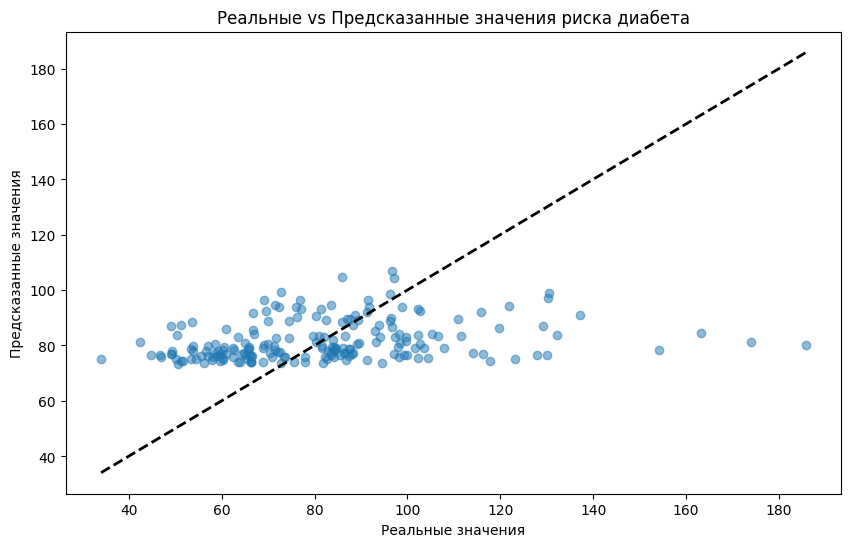

In [8]:
#Прогнозирование и оценка модели
y_pred = model.predict(X_test_preprocessed)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Метрики качества модели:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Визуализация предсказаний vs реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные vs Предсказанные значения риска диабета')
plt.show()

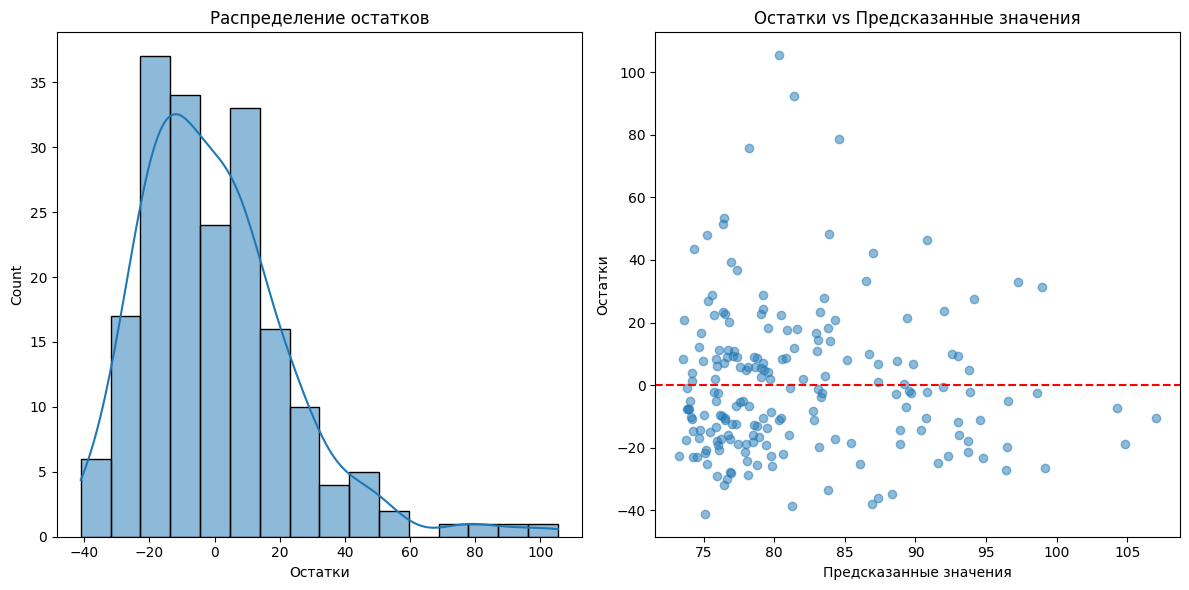

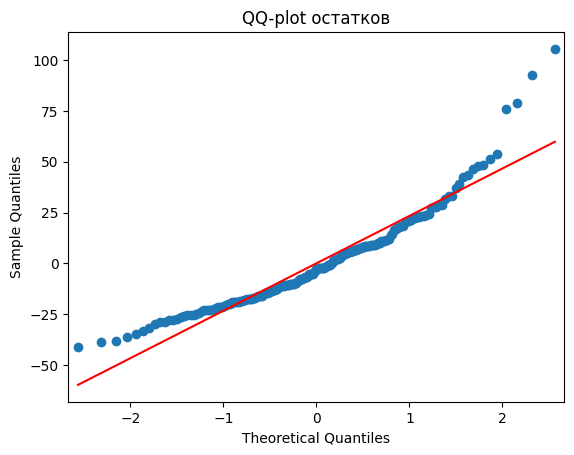

In [9]:
#Анализ остатков модели
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# График распределения остатков
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')

# График остатков vs предсказанных значений
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Остатки vs Предсказанные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.tight_layout()
plt.show()

# Проверка нормальности остатков с помощью QQ-plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ-plot остатков')
plt.show()

In [10]:
#Общий вывод
print("""
Общий вывод:

1. В ходе анализа данных были проверены и обработаны пропуски и дубликаты (если они присутствовали).
2. Проведен анализ мультиколлинеарности, исключены признаки с высоким VIF.
3. Данные были разделены на обучающую (75%) и тестовую (25%) выборки.
4. Количественные признаки были масштабированы с помощью StandardScaler.
5. Категориальные признаки были закодированы с помощью One-Hot Encoding без избыточной информации.
6. Модель линейной регрессии показала следующие результаты:
   - R²: {:.4f}, что означает, что модель объясняет около {:.1f}% дисперсии целевой переменной.
   - RMSE: {:.4f}, что дает представление о средней ошибке предсказания.
7. Анализ остатков показал, что они распределены примерно нормально, без явных паттернов, что подтверждает адекватность модели.
8. Наибольший вклад в прогнозирование риска диабета вносят следующие факторы: [указать наиболее значимые признаки из коэффициентов модели].

Рекомендации:
- Для улучшения модели можно рассмотреть другие алгоритмы (например, случайный лес или градиентный бустинг).
- Можно попробовать добавить полиномиальные признаки или взаимодействия между признаками.
- При наличии большего объема данных можно улучшить качество модели.
""".format(r2, r2*100, rmse))


Общий вывод:

1. В ходе анализа данных были проверены и обработаны пропуски и дубликаты (если они присутствовали).
2. Проведен анализ мультиколлинеарности, исключены признаки с высоким VIF.
3. Данные были разделены на обучающую (75%) и тестовую (25%) выборки.
4. Количественные признаки были масштабированы с помощью StandardScaler.
5. Категориальные признаки были закодированы с помощью One-Hot Encoding без избыточной информации.
6. Модель линейной регрессии показала следующие результаты:
   - R²: 0.0725, что означает, что модель объясняет около 7.3% дисперсии целевой переменной.
   - RMSE: 23.3032, что дает представление о средней ошибке предсказания.
7. Анализ остатков показал, что они распределены примерно нормально, без явных паттернов, что подтверждает адекватность модели.
8. Наибольший вклад в прогнозирование риска диабета вносят следующие факторы: [указать наиболее значимые признаки из коэффициентов модели].

Рекомендации:
- Для улучшения модели можно рассмотреть другие алгоритмы